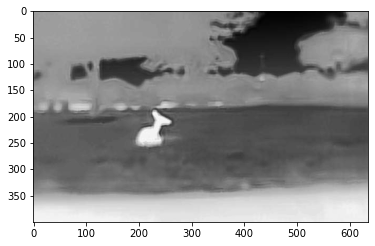

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/bluem/UTSA Research/bestdata/bestagain"
CATEGORIES = ["Lying", "Standing", "Faceon"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to dir for category
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    
        
        

In [3]:
print(img_array.shape)

(400, 635)


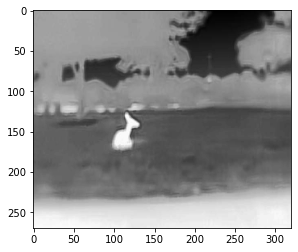

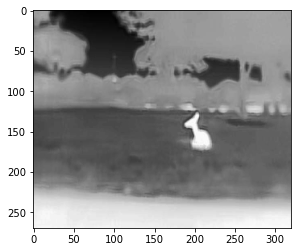

In [14]:



new_array = cv2.resize(img_array, (320, 270)) # image resizing to 200x200
plt.imshow(new_array, cmap='gray')
plt.show()
new_array = cv2.resize(img_array, (320, 270)) # image resizing to 200x200
new_array = cv2.flip(new_array, 1)
plt.imshow(new_array, cmap='gray')
plt.show()


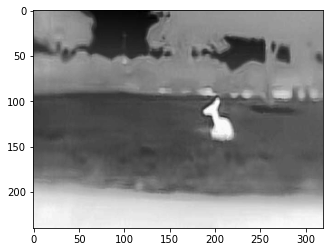

In [15]:
cropped_image = new_array[30:270, 0:320]
plt.imshow(cropped_image, cmap='gray')
plt.show()

In [16]:

# Create the training data set
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to dir for category
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (320, 270)) # image resizing to 200x200
                new_array = new_array[30:270, 0:320] # image cropping to remove the FLIR logo
                training_data.append([new_array, class_num])
                new_array = cv2.flip(new_array, 1)
                training_data.append([new_array, class_num])  
            except Exception as e:
                pass

create_training_data()


In [17]:
print(len(training_data)) # correct length got list of all images




222


In [18]:
import random

#training is a mutable list
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

1
1
2
1
2
1
2
1
0
1


In [19]:
X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)

# unable to pass a list to the neural network
X = np.array(X).reshape(-1, 240, 320, 1)
Y = np.array(Y)

In [20]:

# save the training set
import pickle

pickle_out = open("UNX.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("UNY.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()



In [21]:
# how to load in the training data
pickle_in = open("UNX.pickle", "rb")
X = pickle.load(pickle_in)
X[1]

array([[[ 72],
        [ 72],
        [ 72],
        ...,
        [131],
        [133],
        [133]],

       [[ 72],
        [ 72],
        [ 72],
        ...,
        [132],
        [134],
        [134]],

       [[ 73],
        [ 73],
        [ 73],
        ...,
        [133],
        [134],
        [134]],

       ...,

       [[208],
        [208],
        [208],
        ...,
        [199],
        [198],
        [197]],

       [[208],
        [208],
        [208],
        ...,
        [199],
        [199],
        [199]],

       [[208],
        [208],
        [208],
        ...,
        [199],
        [199],
        [200]]], dtype=uint8)